In [21]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

import matplotlib.pyplot as plt
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS
from sklearn.preprocessing import Normalizer,QuantileTransformer,StandardScaler,MinMaxScaler
# Disable logging messages unless there is an error
set_log_level("ERROR")
import warnings
warnings.filterwarnings('ignore')

def plot_df(df):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 5))

    # Check if the DataFrame 'dfs' is empty
    if df.empty:
        print("Error: DataFrame is empty.")
        # Handle the error as desired, e.g., raise an exception or return an error message

    # Plot the data
    ax.plot(df["ds"], df["y"])

    # Add labels and title
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.set_title("Data Plot")

    # Display the plot
    plt.show()

# Load the dataset
df = pd.read_csv("history_processed.csv", parse_dates=["ds"])
df['unique_id'] = '1D'
df = df[df['ds']>='2018-01-01']
df.head()

,ds,y,unique_id
1829,2018-01-01,0.043786,1D
1830,2018-01-02,0.044341,1D
1831,2018-01-03,0.043549,1D
1832,2018-01-05,0.043675,1D
1833,2018-01-06,0.044008,1D


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2055 entries, 1829 to 3883
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         2055 non-null   datetime64[ns]
 1   y          2055 non-null   float64       
 2   unique_id  2055 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 64.2+ KB


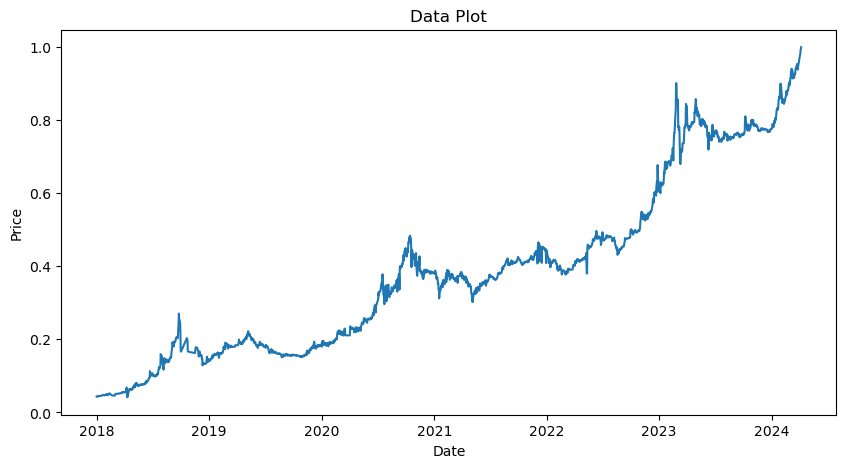

In [23]:
plot_df(df)

Seed set to 1
Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

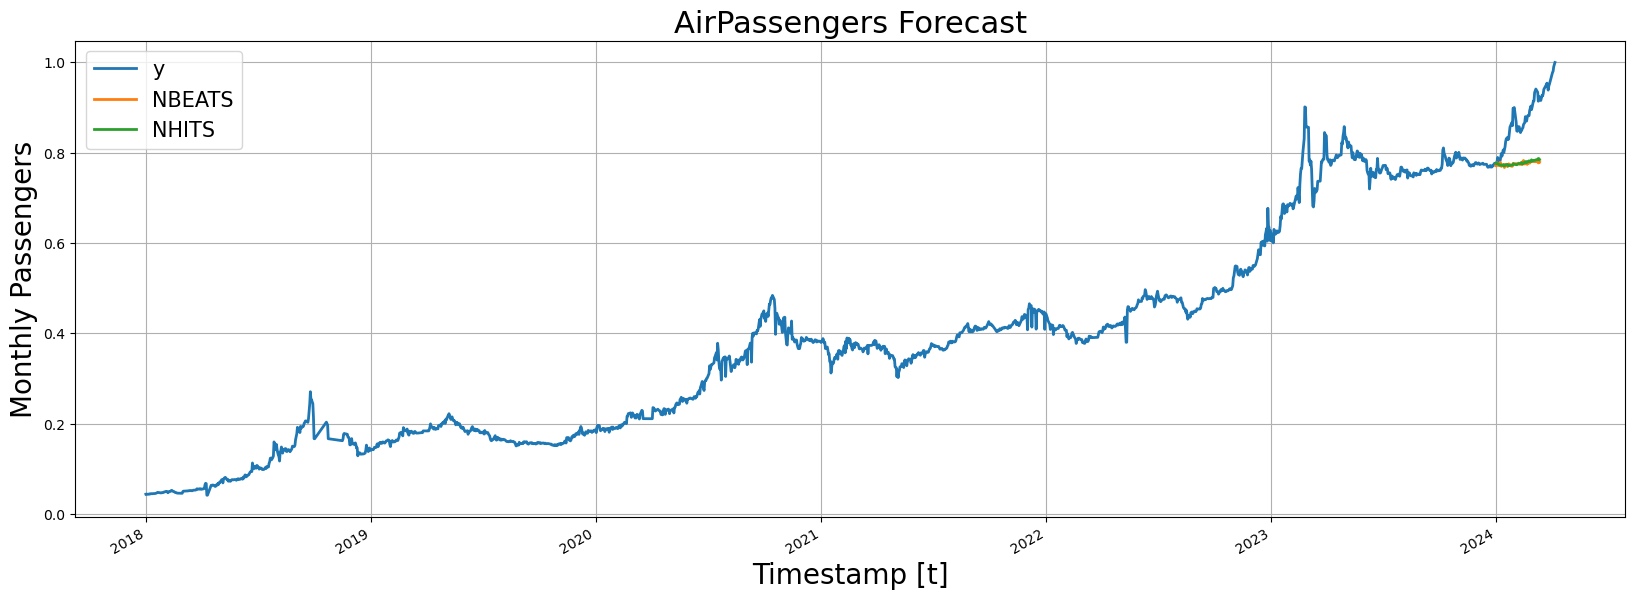

In [26]:
Y_train_df = df[df.ds<='2023-12-31'] 
Y_test_df = df[df.ds>'2023-12-31'] 
# Fit and predict with NBEATS and NHITS models
horizon = len(Y_test_df)
models = [NBEATS(input_size=2 * horizon, h=horizon, max_steps=100),
          NHITS(input_size=2 * horizon, h=horizon, max_steps=100)]
nf = NeuralForecast(models=models, freq='D')
nf.fit(df=Y_train_df)
Y_hat_df = nf.predict().reset_index()

# Plot predictions
fig, ax = plt.subplots(1, 1, figsize = (20, 7))
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')

plot_df[['y', 'NBEATS', 'NHITS']].plot(ax=ax, linewidth=2)

ax.set_title('USD Forecast', fontsize=22)
ax.set_ylabel('Daily Price', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()